In [1]:
# first load all results 
baseline_file = "evaluate_all_result_baseline.json"
attack_file = "evaluate_all_result.json"

import json
baseline_file = json.load(open(baseline_file))
attack_file = json.load(open(attack_file))

dataset_file = "gcg_all_result.jsonl"
dataset_df = {}
with open(dataset_file, "r") as f:
    for line in f:
        item = json.loads(line)
        key = list(item.keys())[0]
        dataset_df[key] = item[key]

import pandas 
baseline_df = pandas.DataFrame.from_dict(baseline_file, orient='index')
attack_df = pandas.DataFrame.from_dict(attack_file, orient='index')
dataset_df = pandas.DataFrame.from_dict(dataset_df, orient='index')
# merge attack_Df and dataset_df
attack_df = attack_df.merge(dataset_df, left_index=True, right_index=True)

attack_file_E4b = "evaluate_all_result_E4b.json"
attack_file_G12b = "evaluate_all_result_G12b.json"

attack_df_E4b = pandas.DataFrame.from_dict(json.load(open(attack_file_E4b)), orient='index')
attack_df_G12b = pandas.DataFrame.from_dict(json.load(open(attack_file_G12b)), orient='index')
attack_df_E4b = attack_df_E4b.merge(dataset_df, left_index=True, right_index=True)
attack_df_G12b = attack_df_G12b.merge(dataset_df, left_index=True, right_index=True)

In [2]:
# iterate loss_history, find the first value < 0, get the index
def get_first_negative_index(loss_history):
    for i, loss in enumerate(loss_history):
        if loss < 0:
            return i
    return -1

attack_df['first_negative_index'] = attack_df['loss_history'].apply(get_first_negative_index)
attack_df['effectiveness'] = 1 - (attack_df['first_negative_index'] / attack_df['loss_history'].apply(len))
attack_df_E4b['first_negative_index'] = attack_df_E4b['loss_history'].apply(get_first_negative_index)
attack_df_E4b['effectiveness'] = 1 - (attack_df_E4b['first_negative_index'] / attack_df_E4b['loss_history'].apply(len))
attack_df_G12b['first_negative_index'] = attack_df_G12b['loss_history'].apply(get_first_negative_index)
attack_df_G12b['effectiveness'] = 1 - (attack_df_G12b['first_negative_index'] / attack_df_G12b['loss_history'].apply(len))

In [3]:
pd_data_result = attack_df[['retrieved_label', 'is_incorrect', 'is_correct']]
# split the row index to 
# SettingWithCopyWarning
pd_data_result[['i', 'position', 'length', 'loss_type']] = pd_data_result.index.to_series().apply(lambda x: pandas.Series(eval(x)))
# iterate loss_history, find the first value < 0, get the index
 
pd_data_result_E4b = attack_df_E4b[['retrieved_label', 'is_incorrect', 'is_correct']]
pd_data_result_G12b = attack_df_G12b[['retrieved_label', 'is_incorrect', 'is_correct']]
pd_data_result_E4b[['i', 'position', 'length', 'loss_type']] = pd_data_result_E4b.index.to_series().apply(lambda x: pandas.Series(eval(x)))
pd_data_result_G12b[['i', 'position', 'length', 'loss_type']] = pd_data_result_G12b.index.to_series().apply(lambda x: pandas.Series(eval(x)))


/tmp/ipykernel_958779/3678688457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_data_result[['i', 'position', 'length', 'loss_type']] = pd_data_result.index.to_series().apply(lambda x: pandas.Series(eval(x)))
/tmp/ipykernel_958779/3678688457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_data_result[['i', 'position', 'length', 'loss_type']] = pd_data_result.index.to_series().apply(lambda x: pandas.Series(eval(x)))
/tmp/ipykernel_958779/3678688457.py:4: SettingWithCopyWarning: 
A value is try

In [18]:
benign_counts

,loss_type,position,length,retrieved_label
0,0,end,1,39
1,0,end,2,15
2,0,end,4,12
3,0,end,8,6
4,0,end,16,8
5,0,mid,1,83
6,0,mid,2,80
7,0,mid,4,78
8,0,mid,8,75
9,0,mid,16,74


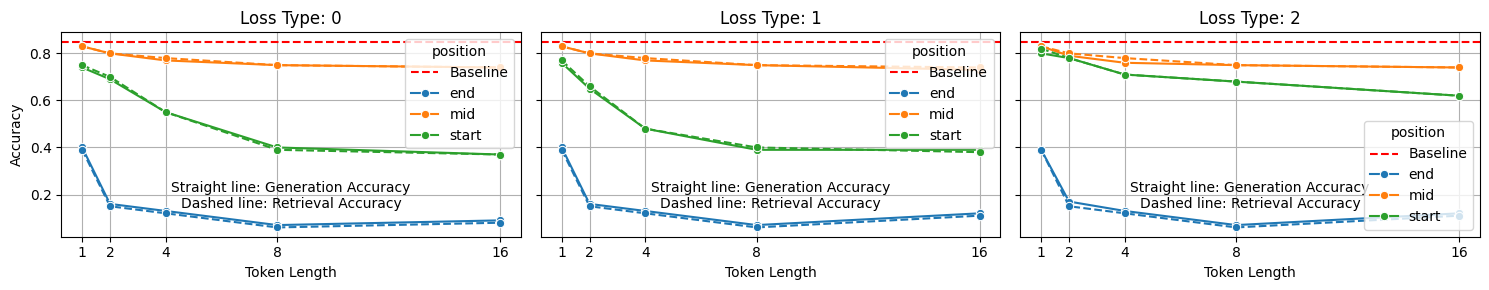

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot 1-4 for different loss, x is the length of token, y is the accuracy, curve means position
# group the data by loss_type, position, and length
grouped_df = pd_data_result.groupby(['loss_type', 'position', 'length'])['is_correct'].mean().reset_index()
# calculate the number of benign_counts == 'benign' for each ['loss_type', 'position', 'length']
benign_counts = pd_data_result[pd_data_result['retrieved_label'] == 'benign'].groupby(['loss_type', 'position', 'length'])['retrieved_label'].count().reset_index()
# divide retrieved_label by 100
benign_counts['retrieved_label'] = benign_counts['retrieved_label'] / 100

# get the baseline is_correct from baseline_df
baseline_is_correct = baseline_df['is_correct'].mean()

# Get unique loss types
loss_types = grouped_df['loss_type'].unique()

# Create subplots
fig, axes = plt.subplots(1, len(loss_types), figsize=(5 * len(loss_types), 3), sharey=True)
if len(loss_types) == 1:
    axes = [axes]

for i, loss_type in enumerate(loss_types):
    ax = axes[i]
    data = grouped_df[grouped_df['loss_type'] == loss_type]
    
    # Plot lines for each position
    # only show 1 2 4 8 16 tokens, set the x axis ticks
    ax.axhline(y=baseline_is_correct, color='r', linestyle='--', label='Baseline')
    sns.lineplot(data=data[data['length'].isin([1, 2, 4, 8, 16])], x='length', y='is_correct', hue='position', marker='o', ax=ax)
    # plot benign counts, dont plot this legend
    sns.lineplot(data=benign_counts[benign_counts['loss_type'] == loss_type], x='length', y='retrieved_label', hue='position', marker='o', ax=ax, linestyle='--', legend=False)
    ax.set_xticks([1, 2, 4, 8, 16])
    # add a horizontal line for the baseline
    
    
    ax.set_title(f'Loss Type: {loss_type}')
    ax.set_xlabel('Token Length')
    ax.set_ylabel('Accuracy')
    ax.grid(True)
    
    # add a text, that straight line is generation accuracy and dashed line is retrieval accuracy
    ax.text(0.5, 0.2, 'Straight line: Generation Accuracy\nDashed line: Retrieval Accuracy', transform=ax.transAxes, ha='center', va='center')

plt.tight_layout()
plt.savefig('pd_data_result.pdf', bbox_inches='tight')
plt.show()

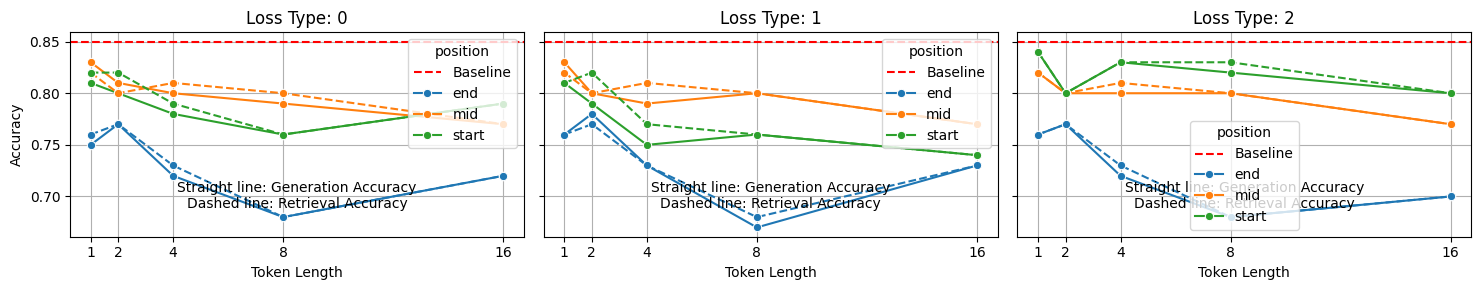

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot 1-4 for different loss, x is the length of token, y is the accuracy, curve means position
# group the data by loss_type, position, and length
grouped_df = pd_data_result_E4b.groupby(['loss_type', 'position', 'length'])['is_correct'].mean().reset_index()
# calculate the number of benign_counts == 'benign' for each ['loss_type', 'position', 'length']
benign_counts = pd_data_result_E4b[pd_data_result_E4b['retrieved_label'] == 'benign'].groupby(['loss_type', 'position', 'length'])['retrieved_label'].count().reset_index()
# divide retrieved_label by 100
benign_counts['retrieved_label'] = benign_counts['retrieved_label'] / 100

# get the baseline is_correct from baseline_df
baseline_is_correct = baseline_df['is_correct'].mean()

# Get unique loss types
loss_types = grouped_df['loss_type'].unique()

# Create subplots
fig, axes = plt.subplots(1, len(loss_types), figsize=(5 * len(loss_types), 3), sharey=True)
if len(loss_types) == 1:
    axes = [axes]

for i, loss_type in enumerate(loss_types):
    ax = axes[i]
    data = grouped_df[grouped_df['loss_type'] == loss_type]
    ax.axhline(y=baseline_is_correct, color='r', linestyle='--', label='Baseline')
    # Plot lines for each position
    # only show 1 2 4 8 16 tokens, set the x axis ticks
    sns.lineplot(data=data[data['length'].isin([1, 2, 4, 8, 16])], x='length', y='is_correct', hue='position', marker='o', ax=ax)
    # plot benign counts, dont plot this legend
    sns.lineplot(data=benign_counts[benign_counts['loss_type'] == loss_type], x='length', y='retrieved_label', hue='position', marker='o', ax=ax, linestyle='--', legend=False)
    ax.set_xticks([1, 2, 4, 8, 16])
    # add a horizontal line for the baseline    
    ax.set_title(f'Loss Type: {loss_type}')
    ax.set_xlabel('Token Length')
    ax.set_ylabel('Accuracy')
    ax.grid(True)
    
    # add a text, that straight line is generation accuracy and dashed line is retrieval accuracy
    ax.text(0.5, 0.2, 'Straight line: Generation Accuracy\nDashed line: Retrieval Accuracy', transform=ax.transAxes, ha='center', va='center')

plt.tight_layout()
plt.savefig('pd_data_result_E4b.pdf', bbox_inches='tight')
plt.show()

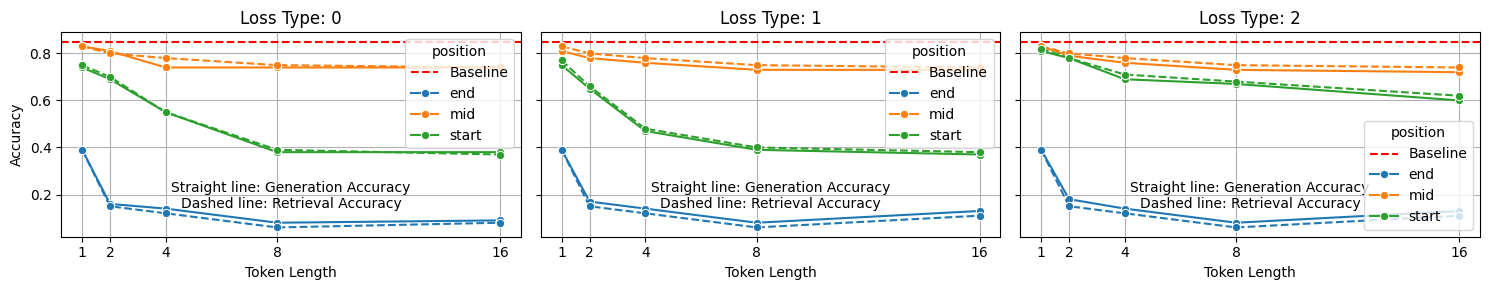

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot 1-4 for different loss, x is the length of token, y is the accuracy, curve means position
# group the data by loss_type, position, and length
grouped_df = pd_data_result_G12b.groupby(['loss_type', 'position', 'length'])['is_correct'].mean().reset_index()
# calculate the number of benign_counts == 'benign' for each ['loss_type', 'position', 'length']
benign_counts = pd_data_result_G12b[pd_data_result_G12b['retrieved_label'] == 'benign'].groupby(['loss_type', 'position', 'length'])['retrieved_label'].count().reset_index()
# divide retrieved_label by 100
benign_counts['retrieved_label'] = benign_counts['retrieved_label'] / 100

# get the baseline is_correct from baseline_df
baseline_is_correct = baseline_df['is_correct'].mean()

# Get unique loss types
loss_types = grouped_df['loss_type'].unique()

# Create subplots
fig, axes = plt.subplots(1, len(loss_types), figsize=(5 * len(loss_types), 3), sharey=True)
if len(loss_types) == 1:
    axes = [axes]

for i, loss_type in enumerate(loss_types):
    ax = axes[i]
    data = grouped_df[grouped_df['loss_type'] == loss_type]
    ax.axhline(y=baseline_is_correct, color='r', linestyle='--', label='Baseline')
    # Plot lines for each position
    # only show 1 2 4 8 16 tokens, set the x axis ticks
    sns.lineplot(data=data[data['length'].isin([1, 2, 4, 8, 16])], x='length', y='is_correct', hue='position', marker='o', ax=ax)
    # plot benign counts, dont plot this legend
    sns.lineplot(data=benign_counts[benign_counts['loss_type'] == loss_type], x='length', y='retrieved_label', hue='position', marker='o', ax=ax, linestyle='--', legend=False)
    ax.set_xticks([1, 2, 4, 8, 16])
    # add a horizontal line for the baseline
    
    ax.set_title(f'Loss Type: {loss_type}')
    ax.set_xlabel('Token Length')
    ax.set_ylabel('Accuracy')
    ax.grid(True)
    
    # add a text, that straight line is generation accuracy and dashed line is retrieval accuracy
    ax.text(0.5, 0.2, 'Straight line: Generation Accuracy\nDashed line: Retrieval Accuracy', transform=ax.transAxes, ha='center', va='center')

plt.tight_layout()
plt.savefig('pd_data_result_G12b.pdf', bbox_inches='tight')
plt.show()

In [4]:
# 